# SLR example on Predicting Salary using Salary_data Dataset
### Srimanta Ghosh(E1773U23013)

##### Data Overview
###### This section provides an initial glimpse into the dataset by printing the first few rows. It helps understand the structure of the dataset, including column names and sample data points.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
Dataset = pd.read_csv(r"C:\Users\gh22s\AppData\Local\Programs\Python\Python312\Scripts\notebooks\Salary_Data.csv")
Dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### Categorical & Numerical Features
###### Here, the code distinguishes between categorical and numerical features in the dataset. Categorical features represent qualitative data, such as text or categories, while numerical features represent quantitative data, such as integers or floats.

In [2]:
df = pd.DataFrame(Dataset)
column_types = df.dtypes

numerical_columns = column_types[column_types != 'object'].index
categorical_columns = column_types[column_types == 'object'].index

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['YearsExperience', 'Salary'], dtype='object')
Categorical columns: Index([], dtype='object')


##### Null Value Check
###### This section checks for missing values in the dataset. It's crucial to identify any missing data as it can impact the analysis and modeling process.

In [3]:
Dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

##### Dependent Feature (Salary)
###### Similar to the previous section, this part identifies and describes the dependent feature, which is 'Salary' in this case. The dependent feature is the variable that we want to predict or explain based on the independent variable.

In [4]:
Y = Dataset[['Salary']]
Y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


##### Independent Feature (Years of Experience)
###### This part specifically identifies and describes the independent feature, which is 'YearsExperience' in this case. The independent feature is the variable that is used to predict or explain changes in the dependent variable..

In [5]:
X = Dataset[['YearsExperience']]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


##### Data Visualization
###### This section creates visualizations to explore relationships between variables. A pairplot displays pairwise relationships between variables, while a heatmap of the correlation matrix provides insight into the strength and direction of relationships between numerical features..

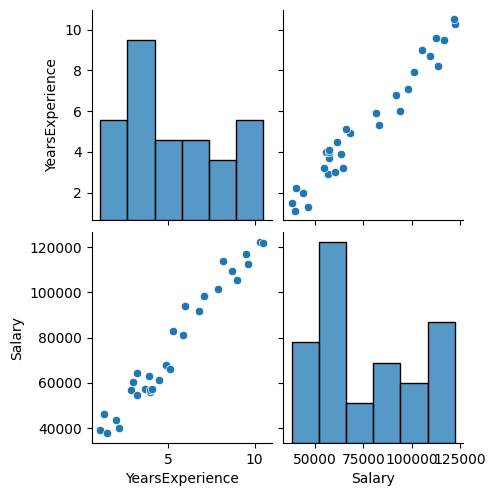

In [6]:
sns.pairplot(Dataset);

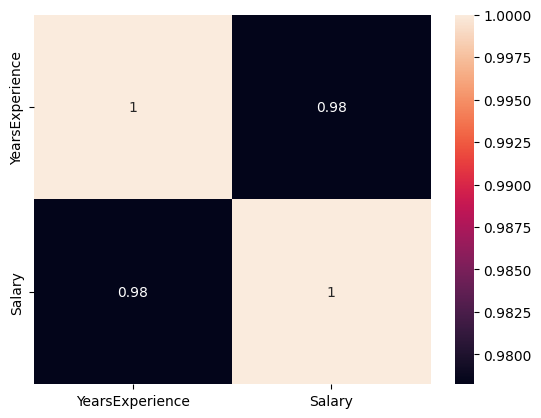

In [7]:
sns.heatmap(Dataset.corr(), annot=True);

##### Data Summery
###### This part provides summary statistics for numerical features in the dataset, including count, mean, standard deviation, minimum, and maximum values. It gives an overview of the distribution and range of each numerical variable.

In [8]:
Dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### Training Dataset
###### Here, the dataset is split into training and testing sets. This step is crucial for evaluating the performance of the model on unseen data and helps prevent overfitting.

In [9]:
df.insert(0, 'beta_0', 1)
#train_ratio = 0.8
indices = np.arange(len(df))

# Shuffle indices array
np.random.shuffle(indices)

# Define the train ratio
train_ratio = 0.8

# Calculate the train size
train_size = int(train_ratio * len(df))

# Split indices into train and test indices
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split the dataframe using shuffled indices
train_data = df.iloc[train_indices]
test_data = df.iloc[test_indices]

# Separate features and target variables for train and test sets
X_train, y_train = train_data.drop(columns=['Salary']), train_data['Salary']
X_test, y_test = test_data.drop(columns=['Salary']), test_data['Salary']

##### Design Matrix
###### The design matrix represents the independent variables used in the regression model. It is a matrix of predictor variables, often denoted as 'X'.

In [10]:
Design_matrix = X_train.values
print(Design_matrix)

[[ 1.   3.2]
 [ 1.   6.8]
 [ 1.   2.2]
 [ 1.   9.6]
 [ 1.   2.9]
 [ 1.   5.9]
 [ 1.   9. ]
 [ 1.  10.3]
 [ 1.   4.5]
 [ 1.   9.5]
 [ 1.   4.9]
 [ 1.   3.7]
 [ 1.   1.3]
 [ 1.   4. ]
 [ 1.   7.1]
 [ 1.   8.2]
 [ 1.   2. ]
 [ 1.   7.9]
 [ 1.   3.9]
 [ 1.   5.1]
 [ 1.   1.5]
 [ 1.   4. ]
 [ 1.   8.7]
 [ 1.   1.1]]


##### Estimating β

###### Estimate the coefficients β of the regression model to quantify the relationship between independent feature and the dependent variable (Salary). These coefficients indicate the strength and direction of the influence of independent variable on the Salary.

$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

In [11]:
x = Design_matrix
beta_cap = np.linalg.inv(x.T @ x) @ x.T @ y_train
dfbeta = pd.DataFrame({"$\\hat{\\beta}$":beta_cap}) 
dfbeta

,$\hat{\beta}$
0,24012.657015
1,9608.878489


##### Projection Matrix
###### The projection matrix calculates the projection of the target variable onto the space spanned by the independent variables. 
$$ \mathbf{P_X} = \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T $$

In [12]:
Projection_matrix = x @ np.linalg.pinv(x.T @ x) @ x.T
print(Projection_matrix)

[[ 0.06438475  0.02551659  0.07518146 -0.00471421  0.06762376  0.03523363
   0.00176382 -0.01227191  0.05034902 -0.00363454  0.04603034  0.05898639
   0.0848985   0.05574738  0.02227757  0.01040119  0.0773408   0.0136402
   0.05682705  0.043871    0.08273916  0.05574738  0.00500283  0.08705784]
 [ 0.02551659  0.05314762  0.0178413   0.07463842  0.023214    0.04623986
   0.07003325  0.08001112  0.03549446  0.07387089  0.03856457  0.02935423
   0.01093354  0.03165681  0.0554502   0.06389302  0.01630624  0.06159043
   0.03088929  0.04009963  0.0124686   0.03165681  0.06773066  0.00939848]
 [ 0.07518146  0.0178413   0.09110928 -0.0267566   0.07995981  0.03217634
  -0.01719991 -0.03790608  0.05447529 -0.02516382  0.04810416  0.06721755
   0.10544432  0.0624392   0.01306295 -0.00445765  0.09429485  0.00032069
   0.06403198  0.0449186   0.10225876  0.0624392  -0.01242156  0.10862989]
 [-0.00471421  0.07463842 -0.0267566   0.13635713 -0.01132693  0.05480026
   0.12313169  0.1517868   0.0239409

##### Plotting Regression line
###### Here, a regression line is plotted on a scatter plot to visualize the relationship between the independent and dependent variable.

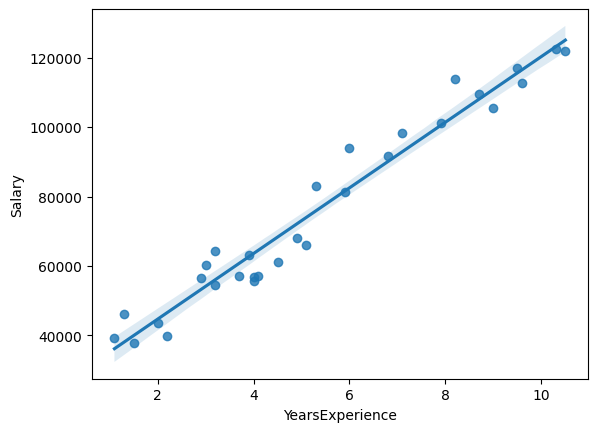

In [13]:
sns.regplot(x='YearsExperience', y='Salary', data=Dataset);

##### Predicted Salary
###### The model predicts salaries for the testing dataset using the trained regression model.

In [14]:
y_pred = X_test.values @ beta_cap
pred_Salary = pd.DataFrame({"Salary (Predicted)":y_pred}) 
pred_Salary

,Salary (Predicted)
0,81665.927949
1,52839.292482
2,63409.058820
3,124905.881149
4,74939.713006
5,54761.068180


##### Comparing Actual and Predicted Salary
###### This section creates a DataFrame comparing the actual salaries with the predicted salaries for the testing dataset.

In [15]:
dfcompare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfcompare['Predicted']=dfcompare['Predicted'].round().astype('int64')
dfcompare

,Actual,Predicted
19,93940.0,81666
6,60150.0,52839
13,57081.0,63409
29,121872.0,124906
17,83088.0,74940
8,64445.0,54761


##### MSE & R squared
###### Mean Squared Error (MSE) and R-squared (R^2) are calculated to evaluate the performance of the regression model.

In [16]:
RSS = ((dfcompare['Actual'] - dfcompare['Predicted']) ** 2).sum()
RSS

413520297.0

In [17]:
TSS = ((dfcompare['Actual'] - dfcompare['Actual'].mean()) ** 2).sum()
TSS

3118329518.0

In [18]:
MSE = RSS/len(y_pred)
MSE

68920049.5

In [19]:
r_squared = 1 - (RSS / TSS)
r_squared

0.8673904426671306

##### Calculating Salary using User Input Data from the Fitted Model
###### Finally, the code prompts the user to input years of experience, and it predicts the salary using the trained model based on the user input. This allows for the application of the model to new, unseen data.

In [20]:
const = 1
Years_of_Experience = int(input("Years of Experience = "))

casual = np.array([[const, Years_of_Experience]])
Salary_emt = beta_cap @ casual.T
print("Salary_emt_Estimated={}".format(Salary_emt[0]))

Years of Experience =  9


Salary_emt_Estimated=110492.5634151817
